In [1]:
from rasterstats import zonal_stats
from multiprocessing import Pool
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('/mnt/inca/tillage_index/validate_data/LUCAS_lulc/004_vld_lucas.lulc.csv', low_memory=False)
df_ag = df.loc[df['lc1_class']=='B']
df_ag['lc1_level2'] = df_ag['lc1'].str[0:2]

In [14]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

selected_predictors = ['ndvi.p50', 'ndwi.p50', 'bs', 'csr','nos'] #'ndwi.p25', 'ndwi.p75', 'ndvi.p75', 'ndvi.p25','nos', 'bs', 'csr',  
target_variable = 'lc1_level2'
X = df_ag[selected_predictors]
y = df_ag[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_predictors, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Calculate and print evaluation metrics
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report for detailed metrics
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


    Feature  Importance
0  ndvi.p50    0.445153
1  ndwi.p50    0.442097
2        bs    0.052031
3       csr    0.037408
4       nos    0.023311
Accuracy: 0.65
Precision: 0.54
Recall: 0.65
F1-Score: 0.57

Confusion Matrix:
[[31325   242   890   187   878     7    20    45]
 [ 1900    24    69     6    45     0     0     4]
 [ 5752    55   305    48   130     1     6    11]
 [ 1591    11    57    15    46     0     1     3]
 [ 3992    28    94    20   939     2     8     7]
 [  194     0     0     1    24     0     1     0]
 [  280     0     6     4    19     0     0     0]
 [  741     2    19     5    41     0     2     1]]

Classification Report:
               precision    recall  f1-score   support

          B1       0.68      0.93      0.79     33594
          B2       0.07      0.01      0.02      2048
          B3       0.21      0.05      0.08      6308
          B4       0.05      0.01      0.01      1724
          B5       0.44      0.18      0.26      5090
          B7       

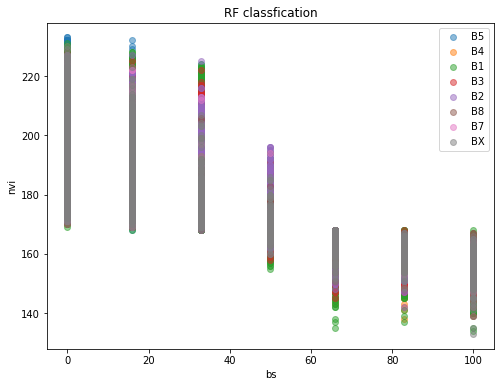

In [13]:
plt.figure(figsize=(8, 6))
for cluster in df_ag['lc1_level2'].unique():
    plt.scatter(df_ag[df_ag['lc1_level2'] == cluster]['bs'],df_ag[df_ag['lc1_level2'] == cluster]['ndvi.p50'], label=cluster,alpha=0.5)

plt.xlabel('bs')
plt.ylabel('ndvi')
plt.title('RF classfication')
plt.legend()
plt.show()

/home/opengeohub/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/opengeohub/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/opengeohub/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/opengeohub/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

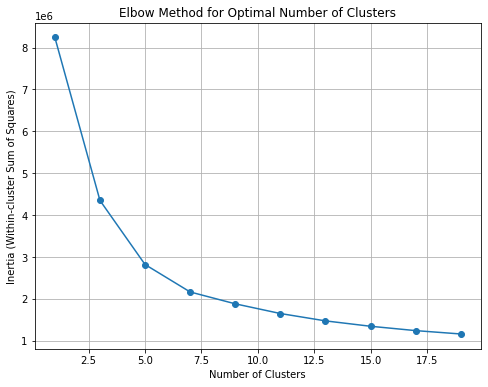

In [6]:
inertia_values = []
cluster_range = np.arange(1, 21,2)  # You can adjust this range

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(cluster_data_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [6]:
df['lc1_label'].unique()

array(['Non built-up area features', 'Temporary grasslands',
       'Buildings with 1 to 3 floors', 'Mixed woodland',
       'Spontaneously vegetated surfaces', 'Other fresh vegetables',
       'Bare land', 'Broadleaved woodland', 'Barley', 'Common wheat',
       'Grassland without tree/shrub cover',
       'Shrubland with sparse tree cover', 'Maize',
       'Rape and turnip rape', 'Lucerne', 'Sunflower', 'Durum wheat',
       'Potatoes', 'Grassland with sparse tree/shrub cover', 'Oats',
       'Rye', 'Strawberries', 'Other leguminous and mixtures for fodder',
       'Coniferous woodland', 'Dry pulses', 'Clovers',
       'Mixed cereals for fodder', 'Triticale', 'Olive groves',
       'Sugar beet', 'Other fibre and oleaginous crops',
       'Shrubland without tree cover', 'Soya',
       'Other non-permanent industrial crops', 'Tomatoes',
       'Non built-up linear features', 'Inland running water',
       'Vineyards', 'Transitional water bodies', 'Inland water bodies',
       'Peatbogs

In [ ]:

# from eumap.misc import find_files, nan_percentile, GoogleSheet
# from eumap.raster import read_rasters, save_rasters
# from eumap.mapper import SpaceOverlay


# with open('/mnt/inca/tillage_index/validate_data/LUCAS_lulc/layers.txt', 'r') as file:
#     lines = file.readlines()
# layers = [line.strip() for line in lines]

# for i in layers:
#     print(i)

# # overlay with annual covariates first
# from pathlib import Path
# year = gdf['year'].unique().tolist()
# year.sort()
# year = [int(y) for y in year]

# names = ['ndvi.p25','ndwi.p25', 'ndvi.p75', 'ndwi.p75','bs','csr','ndvi.p50','ndwi.p50','nos','trend-ndvi.p50','trend-bs.p50']

# for y in year:
#     tmp_gpkg = f'/mnt/inca/tillage_index/validate_data/LUCAS_lulc/001_tmp_lulc.overlay.{y}.gpkg'
    
#     dfy = gdf.loc[gdf['year']==y]
#     dfy.to_file(tmp_gpkg, driver='GPKG')
    
#     files = [i.replace('{year}',str(y)) for i in layers]
#     fnames = [i.split('/')[-1][0:-4] for i in files]
#     name_map = dict(zip(fnames,names))
#     files = [Path(i) for i in files]

#     dfo = SpaceOverlay(tmp_gpkg, fn_layers=files, max_workers=50, verbose=False)
#     dft = dfo.run()
#     dft = dft.rename(columns=name_map)
#     dft.to_csv(f'/mnt/inca/tillage_index/validate_data/LUCAS_lulc/001_tmp_lulc.overlay.{y}.csv', index=False)
    
# gdf = []
# for y in year:
#     temp = pd.read_csv(f'/mnt/inca/tillage_index/validate_data/LUCAS_lulc/001_tmp_lulc.overlay.{y}.csv', low_memory=False)
#     gdf.append(temp)
    
# gdf = pd.concat(gdf)
# gdf = gdf.drop(columns=['overlay_id','geometry'])

# gdf = gdf.loc[gdf['lc1']!='8']
# gdf['lc1_class'] = gdf['lc1'].astype(str).str[0]

# # # df = pd.read_csv('/mnt/inca/tillage_index/validate_data/LUCAS_lulc/004_vld_lucas.lulc.csv', low_memory=False)
# # gdf = gdf.drop(columns=['nuts2', 'lc1_label', 'lu1_label','crop_residues','lc1_class'])
# # df = df.merge(gdf,how='inner',on=['year','gps_lat','gps_long','lc1','lu1','survey_date'])

# gdf = gdf.dropna(subset=['nos', 'bs', 'trend-bs.p50', 'csr', 'trend-ndvi.p50', 'ndvi.p50', 'ndwi.p50', 'ndwi.p25', 'ndwi.p75', 'ndvi.p75', 'ndvi.p25'])
# gdf.to_csv(f'/mnt/inca/tillage_index/validate_data/LUCAS_lulc/004_vld_lucas.lulc.csv', index=False)